#### Николаев Евгений Алексеевич, группа 22.М08-мм

# Задача 3. Многоклассовая классификация и множественная классификация/регрессия

- [x] Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже.
- [x] Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- [x] Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику AUC-ROC.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv('test.csv')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [62]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [63]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [64]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 2. Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

In [65]:
sns.set(style="whitegrid")

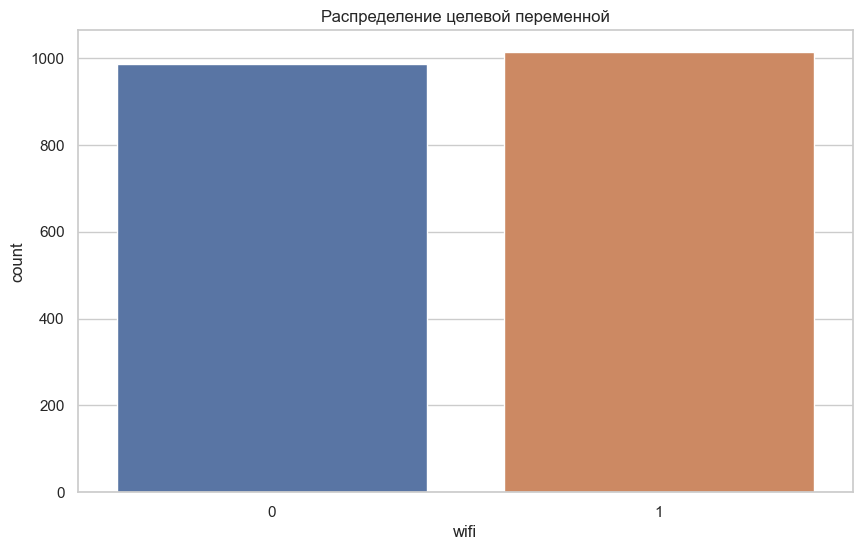

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='wifi', data=data)
plt.title('Распределение целевой переменной')
plt.show()

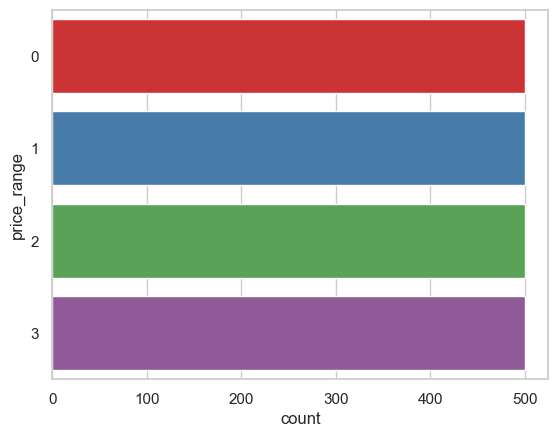

In [67]:
sns.countplot(data=data, y="price_range", palette="Set1")
plt.show()

<AxesSubplot: xlabel='price_range', ylabel='Count'>

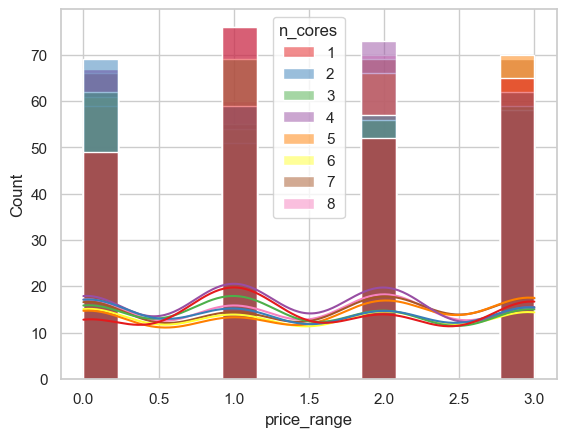

In [68]:
sns.histplot(x='price_range', hue='n_cores', data=data, kde=True, palette='Set1')

## 3. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

X = data.drop('price_range', axis=1)
y = data['price_range']

#### Разделение выборок на тестовую и обучающую.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

### OneVsRest

####  Logistic Regression

In [71]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = { 
    'C': [1, 10, 100],
    'solver': ['sag', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2']
}
model = LogisticRegression()
grid = GridSearchCV(model, params, scoring = 'roc_auc', cv=5)
ovr_lr_model = OneVsRestClassifier(grid)

In [72]:
import time
start_time = time.time()
ovr_lr_model.fit(X_train_scaled, y_train)
end_time = time.time()
from sklearn.metrics import accuracy_score
y_pred = ovr_lr_model.predict(X_test_scaled)
ovr_lr_accuracy = accuracy_score(y_test, y_pred)
ovr_lr_time = end_time - start_time

#### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovr_knn_model = OneVsRestClassifier(grid)

In [74]:
start_time = time.time()
ovr_knn_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = ovr_knn_model.predict(X_test_scaled)

ovr_knn_accuracy = accuracy_score(y_test, y_pred)
ovr_knn_time = end_time - start_time

#### SVM

In [113]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'sigmoid']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovr_svm_model = OneVsRestClassifier(grid)

In [114]:
start_time = time.time()
ovr_svm_model.fit(X_train_scaled, y_train)
end_time = time.time()
y_pred = ovr_svm_model.predict(X_test_scaled)
ovr_svm_accuracy = accuracy_score(y_test, y_pred)
ovr_svm_time = end_time - start_time

#### Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovr_nb_model = OneVsRestClassifier(grid)

In [116]:
start_time = time.time()
ovr_nb_model.fit(X_train_scaled, y_train)
end_time = time.time()
y_pred = ovr_nb_model.predict(X_test_scaled)
ovr_nb_accuracy = accuracy_score(y_test, y_pred)
ovr_nb_time = end_time - start_time

#### Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovr_dt_model = OneVsRestClassifier(grid)

In [118]:
start = time.time()
ovr_dt_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovr_dt_model.predict(X_test_scaled)
ovr_dt_accuracy = accuracy_score(y_test, y_pred)
ovr_dt_time = end - start

### OneVsOne

#### Logistic Regression

In [119]:
from sklearn.multiclass import OneVsOneClassifier

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 2500, 5000, 10000]
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovo_lr_model = OneVsOneClassifier(grid)

In [120]:
start = time.time()
ovo_lr_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovo_lr_model.predict(X_test_scaled)
ovo_lr_accuracy = accuracy_score(y_test, y_pred)
ovo_lr_time = end - start

#### KNN

In [121]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovo_knn_model = OneVsOneClassifier(grid)

In [122]:
start = time.time()
ovo_knn_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovo_knn_model.predict(X_test_scaled)
ovo_knn_accuracy = accuracy_score(y_test, y_pred)
ovo_knn_time = end - start

#### SVM

In [123]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovo_svm_model = OneVsOneClassifier(grid)

In [124]:
start = time.time()
ovo_svm_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovo_svm_model.predict(X_test_scaled)
ovo_svm_accuracy = accuracy_score(y_test, y_pred)
ovo_svm_time = end - start

#### Naive Bayes

In [125]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovo_nb_model = OneVsOneClassifier(grid)

In [126]:
start = time.time()
ovo_nb_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovo_nb_model.predict(X_test_scaled)
ovo_nb_accuracy = accuracy_score(y_test, y_pred)
ovo_nb_time = end - start

#### Decision Tree

In [127]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
ovo_dt_model = OneVsOneClassifier(grid)

In [128]:
start = time.time()
ovo_dt_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = ovo_dt_model.predict(X_test_scaled)
ovo_dt_accuracy = accuracy_score(y_test, y_pred)
ovo_dt_time = end - start

### OutputCode

#### Logistic Regression

In [129]:
from sklearn.multiclass import OutputCodeClassifier

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 2500, 5000, 10000]
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
oc_lr_model = OutputCodeClassifier(grid)

In [130]:
start = time.time()
oc_lr_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_lr_model.predict(X_test_scaled)

oc_lr_accuracy = accuracy_score(y_test, y_pred)
oc_lr_time = end - start

#### KNN

In [131]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
oc_knn_model = OutputCodeClassifier(grid)

In [132]:

start = time.time()
oc_knn_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = oc_knn_model.predict(X_test_scaled)
oc_knn_accuracy = accuracy_score(y_test, y_pred)
oc_knn_time = end - start

#### SVM

In [133]:
param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'sigmoid']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
oc_svm_model = OutputCodeClassifier(grid)

In [134]:
start = time.time()
oc_svm_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = oc_svm_model.predict(X_test_scaled)
oc_svm_accuracy = accuracy_score(y_test, y_pred)
oc_svm_time = end - start

#### Naive Bayes

In [135]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
oc_nb_model = OutputCodeClassifier(grid)

In [136]:
start = time.time()
oc_nb_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = oc_nb_model.predict(X_test_scaled)
oc_nb_accuracy = accuracy_score(y_test, y_pred)
oc_nb_time = end - start

#### Decision Tree

In [137]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
oc_dt_model = OutputCodeClassifier(grid)

In [138]:
start = time.time()
oc_dt_model.fit(X_train_scaled, y_train)
end = time.time()
y_pred = oc_dt_model.predict(X_test_scaled)
oc_dt_accuracy = accuracy_score(y_test, y_pred)
oc_dt_time = end - start

## 5.  Замерить время обучения каждой модели для каждой стратегии. + сравнение


### Время

In [144]:
print("OneVsRest-LR = ", ovr_lr_time)
print("OneVsRest-KNN = ", ovr_knn_time)
print("OneVsRest-SVM = ", ovr_svm_time)
print("OneVsRest-NB = ", ovr_nb_time)
print("OneVsRest-DT = ", ovr_dt_time)
print("OneVsOne-LR = ", ovo_lr_time)
print("OneVsOne-KNN = ", ovo_knn_time)
print("OneVsOne-SVM = ", ovo_svm_time)
print("OneVsOne-NB = ", ovo_nb_time)
print("OneVsOne-DT = ", ovo_dt_time)
print("OutputCode-LR = ", oc_lr_time)
print("OutputCode-KNN = ", oc_knn_time)
print("OutputCode-SVM = ", oc_svm_time)
print("OutputCode-NB = ", oc_nb_time)
print("OutputCode-DT = ", oc_dt_time)

OneVsRest-LR =  3.288613796234131
OneVsRest-KNN =  1.0424818992614746
OneVsRest-SVM =  8.787697792053223
OneVsRest-NB =  0.10109281539916992
OneVsRest-DT =  5.53947901725769
OneVsOne-LR =  1.0286800861358643
OneVsOne-KNN =  0.7544612884521484
OneVsOne-SVM =  3.602546215057373
OneVsOne-NB =  0.0747671127319336
OneVsOne-DT =  4.77088475227356
OutputCode-LR =  1.3481619358062744
OutputCode-KNN =  1.2526798248291016
OutputCode-SVM =  8.351883888244629
OutputCode-NB =  0.06495165824890137
OutputCode-DT =  5.333208799362183


#### 6. AUC-ROC - использовалась при подборе гиперпараметров.
#### 7. Самое быстрое обучение - OutputCode-NB (0.06 сек). Самое долгое обучение OutputCode-DT (8.8 секунд)

### Точность

In [145]:
print("OneVsRest-LR = ", ovr_lr_accuracy)
print("OneVsRest-KNN = ", ovr_knn_accuracy)
print("OneVsRest-SVM = ", ovr_svm_accuracy)
print("OneVsRest-NB = ", ovr_nb_accuracy)
print("OneVsRest-DT = ", ovr_dt_accuracy)
print("OneVsOne-LR = ", ovo_lr_accuracy)
print("OneVsOne-KNN = ", ovo_knn_accuracy)
print("OneVsOne-SVM = ", ovo_svm_accuracy)
print("OneVsOne-NB = ", ovo_nb_accuracy)
print("OneVsOne-DT = ", ovo_dt_accuracy)
print("OutputCode-LR = ", oc_lr_accuracy)
print("OutputCode-KNN = ", oc_knn_accuracy)
print("OutputCode-SVM = ", oc_svm_accuracy)
print("OutputCode-NB = ", oc_nb_accuracy)
print("OutputCode-DT = ", oc_dt_accuracy)

OneVsRest-LR =  0.89
OneVsRest-KNN =  0.58
OneVsRest-SVM =  0.8025
OneVsRest-NB =  0.8075
OneVsRest-DT =  0.8525
OneVsOne-LR =  0.98
OneVsOne-KNN =  0.5575
OneVsOne-SVM =  0.9725
OneVsOne-NB =  0.7975
OneVsOne-DT =  0.8075
OutputCode-LR =  0.755
OutputCode-KNN =  0.4625
OutputCode-SVM =  0.7075
OutputCode-NB =  0.595
OutputCode-DT =  0.6525


#### 6. AUC-ROC - использовалась при подборе гиперпараметров.

#### 7. Самы лучшие модели - OneBsOne-LG (accuracy = 0.98) и OutputCode-SVM (accuracy = 0.975)
